In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

dataset = pd.read_csv("dublinbikes_20200101_20200401.csv")

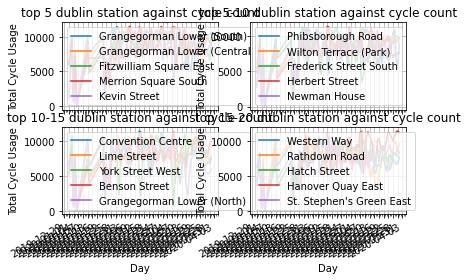

In [2]:
df = dataset
eval_df = df.copy()
eval_df['TIME'] = pd.to_datetime(eval_df['TIME'])
eval_df['date'] = eval_df['TIME'].dt.floor('D')

eval_df = eval_df.groupby(['STATION ID','date', 'STATUS', 'ADDRESS']).agg({'AVAILABLE BIKES': 'sum', 'AVAILABLE BIKE STANDS': 'sum'})
eval_df = eval_df.reset_index(level=[0,1,2,3])

top_address = eval_df.groupby('ADDRESS')['AVAILABLE BIKE STANDS'].sum().nlargest(20).index.tolist()
top_df = pd.DataFrame(columns=eval_df.columns)
for address in top_address:
    res = eval_df[eval_df['ADDRESS'] == address]
    top_df = top_df.append(res)

# normal plot show
top_df.set_index('date', inplace=True)

fig, ax = plt.subplots(2, 2)
# minimize the gap between time interval
def plot_graph(ax, top_address, label):
    for address in top_address:
         ax.plot(top_df[top_df['ADDRESS'] == address].index, top_df[top_df['ADDRESS'] == address]['AVAILABLE BIKE STANDS'], label = address)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    ax.grid(True)
    ax.set_title(f'top {label} dublin station against cycle count')
    ax.set_xlabel("Day")
    ax.set_ylabel("Total Cycle Usage")
    ax.legend(loc="upper left")
    return ax
ax[0,0] = plot_graph(ax[0,0], top_address[0:5],'5')
ax[0,1] = plot_graph(ax[0,1], top_address[5:10], '5-10')
ax[1,0] = plot_graph(ax[1,0], top_address[10:15], '10-15')
ax[1,1] = plot_graph(ax[1,1], top_address[15:20], '15-20')
fig.tight_layout()

fig.subplots_adjust(hspace=0.2, wspace = 0.2)

plt.show()

In [3]:
%matplotlib qt 
df1 = df.copy()
df1['STATUS'] = df1['STATUS'].astype('category')
df1['LAST UPDATED'] = pd.to_datetime(df1['LAST UPDATED'])
df1['TIME'] = pd.to_datetime(df1['TIME'])
df1['formatted_time'] = df1['TIME'].dt.floor('h')
#ts = pd.to_datetime('2020/01/01')
#te = pd.to_datetime('2020/01/07')
#mask = (df1['TIME'] >= ts) & (df1['TIME'] <= te)
#df1.loc[mask]
#df['TIME'].max() - df['TIME'].min()

df1['day_of_week'] = df1['formatted_time'].dt.strftime('%A')
df1['day_of_month'] = df1['formatted_time'].dt.strftime('%d').astype(np.int64)
df1['hour'] = df1['formatted_time'].dt.strftime('%H').astype(np.int64)
df1['month'] = df1['formatted_time'].dt.strftime('%m').astype(np.int64)
df1['week'] = df1['formatted_time'].dt.strftime('%w').astype(np.int64)
numeric_columns = df1.select_dtypes(['int64']).columns
print(df1[numeric_columns].describe().T)
print(df1.select_dtypes(['category']).describe().T)
print(df1.dtypes)

                           count       mean        std   min   25%   50%  \
STATION ID             2228278.0  60.196628  33.598271   2.0  31.0  61.0   
BIKE STANDS            2228278.0  32.184342   7.666891  16.0  29.0  30.0   
AVAILABLE BIKE STANDS  2228278.0  20.456110  11.140868   0.0  12.0  20.0   
AVAILABLE BIKES        2228278.0  11.644086   9.980968   0.0   3.0  10.0   
day_of_month           2228278.0  15.902037   9.262035   1.0   8.0  16.0   
hour                   2228278.0  11.556068   6.876381   0.0   6.0  12.0   
month                  2228278.0   2.317890   0.729879   1.0   2.0   2.0   
week                   2228278.0   2.991054   1.976522   0.0   1.0   3.0   

                        75%    max  
STATION ID             90.0  117.0  
BIKE STANDS            40.0   40.0  
AVAILABLE BIKE STANDS  29.0   41.0  
AVAILABLE BIKES        18.0   40.0  
day_of_month           24.0   31.0  
hour                   17.0   23.0  
month                   3.0    4.0  
week               

In [15]:
ts = pd.to_datetime('2020/02/01')
te = pd.to_datetime('2020/04/01')
# ts = pd.to_datetime('2020/03/15')
# te = pd.to_datetime('2020/04/01')
mask = (df1['TIME'] >= ts) & (df1['TIME'] <= te)
pd.options.mode.chained_assignment = None
#df['TIME'].max() - df['TIME'].min()
#suburb_point = "Merrion Square South"
#suburb_point = "Phibsborough Road"
suburb_point = "Grangegorman Lower (South)"

suburb_df = df1.loc[mask]
suburb_df = suburb_df[suburb_df['ADDRESS'] == suburb_point]
suburb_dataset = suburb_df[['TIME', 'AVAILABLE BIKES']]
#fig, ax = plt.subplots()

suburb_dataset['date'] = suburb_dataset['TIME'].dt.floor('T')
suburb_dataset = suburb_dataset.reset_index()
suburb_dataset.drop('TIME',axis=1, inplace=True)
time = suburb_dataset['date']
bikes = suburb_dataset['AVAILABLE BIKES']
#plot 2 week data for Merrion Square South region
fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.scatter(time,bikes, color="red", marker=".", label='bike count')
ax.set_xlabel("date")
ax.set_ylabel("bike available")
fig.autofmt_xdate()
ax.grid(True)
ax.set_title(f'Bike usage for {suburb_point}')
plt.show()
suburb_df

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,formatted_time,day_of_week,day_of_month,hour,month,week
347622,103,2020-02-01 00:00:02,2020-01-31 23:55:54,GRANGEGORMAN LOWER (SOUTH),40,40,0,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-02-01 00:00:00,Saturday,1,0,2,6
347623,103,2020-02-01 00:05:02,2020-01-31 23:55:54,GRANGEGORMAN LOWER (SOUTH),40,40,0,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-02-01 00:00:00,Saturday,1,0,2,6
347624,103,2020-02-01 00:10:02,2020-02-01 00:06:02,GRANGEGORMAN LOWER (SOUTH),40,40,0,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-02-01 00:00:00,Saturday,1,0,2,6
347625,103,2020-02-01 00:15:02,2020-02-01 00:06:02,GRANGEGORMAN LOWER (SOUTH),40,40,0,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-02-01 00:00:00,Saturday,1,0,2,6
347626,103,2020-02-01 00:20:02,2020-02-01 00:16:11,GRANGEGORMAN LOWER (SOUTH),40,40,0,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-02-01 00:00:00,Saturday,1,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192561,103,2020-03-31 23:35:02,2020-03-31 23:32:00,GRANGEGORMAN LOWER (SOUTH),40,38,2,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-03-31 23:00:00,Tuesday,31,23,3,2
2192562,103,2020-03-31 23:40:02,2020-03-31 23:32:00,GRANGEGORMAN LOWER (SOUTH),40,38,2,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-03-31 23:00:00,Tuesday,31,23,3,2
2192563,103,2020-03-31 23:45:02,2020-03-31 23:42:08,GRANGEGORMAN LOWER (SOUTH),40,38,2,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-03-31 23:00:00,Tuesday,31,23,3,2
2192564,103,2020-03-31 23:50:03,2020-03-31 23:42:08,GRANGEGORMAN LOWER (SOUTH),40,38,2,Open,Grangegorman Lower (South),53.354664,-6.278681,2020-03-31 23:00:00,Tuesday,31,23,3,2


In [102]:
from sklearn.metrics import mean_squared_error
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from tensorflow.keras.optimizers import Adam
import keras
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

%matplotlib qt 

t_full = pd.array(pd.DatetimeIndex(suburb_df.iloc[:,1]).astype(np.int64))/1000000000
dt = t_full[1]-t_full[0]

q=12
lag=3
stride=1
w=math.floor(7*24*60*60/dt)
length = bikes.size - w - lag * w - q
print(bikes.size, w, lag, q, length)
XX=bikes[q:q+length:stride]
#week
for i in range(1,lag):
    X=bikes[i*w+q:i*w+q+length:stride]
    XX=np.column_stack((XX,X))
d=math.floor(24*60*60/dt)
#days
for i in range(0,lag):
    X=bikes[i*d+q:i*d+q+length:stride]
    XX=np.column_stack((XX,X))

for i in range(0,lag):
    X=bikes[i:i+length:stride]
    XX=np.column_stack((XX,X))

yy=bikes[lag*w+w+q:lag*w+w+q+length:stride] 
tt=time[lag*w+w+q:lag*w+w+q+length:stride]

yy.reset_index(drop=True, inplace=True)
tt.reset_index(drop=True, inplace=True)


train, test = train_test_split(np.arange(0,yy.size),test_size=0.2)

model = Sequential()
model.add(Dense(128, activation="relu", input_dim=9))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# 10000000
# 15000
history = model.fit(XX[train], yy[train], validation_data=(XX[test], yy[test]), epochs=5000, batch_size=100, verbose=2,
                    callbacks=[es])
ypred = model.predict(XX)


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()
ax1.set_title('loss of the neural model')
ax1.axis('tight')
#pyplot.show()

ax2.set_title('Training Set')
ax2.scatter(time, bikes, color="deepskyblue")
ax2.scatter(tt, ypred, color="lightgreen")
ax2.set_xlabel("time (days)")
ax2.set_ylabel("#bikes")
ax2.legend(["training data","predictions"],loc="upper right")
fig.autofmt_xdate()
scores = r2_score(yy,ypred)
print(scores)
# 0.969764426600568
plt.show()

C:\Users\rkhna\AppData\Local\Temp/ipykernel_12788/1075486512.py:22: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full = pd.array(pd.DatetimeIndex(suburb_df.iloc[:,1]).astype(np.int64))/1000000000
C:\Users\rkhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17127 2016 3 12 9051
Epoch 1/5000
73/73 - 0s - loss: 56.2280 - val_loss: 42.7719
Epoch 2/5000
73/73 - 0s - loss: 39.9218 - val_loss: 34.3127
Epoch 3/5000
73/73 - 0s - loss: 32.0092 - val_loss: 28.9863
Epoch 4/5000
73/73 - 0s - loss: 27.8162 - val_loss: 25.7603
Epoch 5/5000
73/73 - 0s - loss: 25.3821 - val_loss: 26.3119
Epoch 6/5000
73/73 - 0s - loss: 23.3813 - val_loss: 21.9214
Epoch 7/5000
73/73 - 0s - loss: 21.2472 - val_loss: 20.6019
Epoch 8/5000
73/73 - 0s - loss: 19.7611 - val_loss: 19.4108
Epoch 9/5000
73/73 - 0s - loss: 18.4367 - val_loss: 18.6474
Epoch 10/5000
73/73 - 0s - loss: 17.3456 - val_loss: 17.8020
Epoch 11/5000
73/73 - 0s - loss: 16.5060 - val_loss: 16.7090
Epoch 12/5000
73/73 - 0s - loss: 15.4982 - val_loss: 17.0873
Epoch 13/5000
73/73 - 0s - loss: 15.3579 - val_loss: 15.1924
Epoch 14/5000
73/73 - 0s - loss: 14.5808 - val_loss: 15.2842
Epoch 15/5000
73/73 - 0s - loss: 13.8795 - val_loss: 14.8168
Epoch 16/5000
73/73 - 0s - loss: 13.5743 - val_loss: 14.3207
Epoch 17/500

Epoch 138/5000
73/73 - 0s - loss: 4.1867 - val_loss: 5.9222
Epoch 139/5000
73/73 - 0s - loss: 4.1353 - val_loss: 5.4199
Epoch 140/5000
73/73 - 0s - loss: 4.1172 - val_loss: 6.1401
Epoch 141/5000
73/73 - 0s - loss: 4.0114 - val_loss: 5.5921
Epoch 142/5000
73/73 - 0s - loss: 4.1233 - val_loss: 5.2658
Epoch 143/5000
73/73 - 0s - loss: 4.0892 - val_loss: 5.3293
Epoch 144/5000
73/73 - 0s - loss: 4.0934 - val_loss: 5.2649
Epoch 145/5000
73/73 - 0s - loss: 4.1483 - val_loss: 5.7431
Epoch 146/5000
73/73 - 0s - loss: 3.9551 - val_loss: 5.2966
Epoch 147/5000
73/73 - 0s - loss: 4.0334 - val_loss: 5.6838
Epoch 148/5000
73/73 - 0s - loss: 4.1574 - val_loss: 5.2360
Epoch 149/5000
73/73 - 0s - loss: 4.0457 - val_loss: 5.1065
Epoch 150/5000
73/73 - 0s - loss: 3.9658 - val_loss: 5.4260
Epoch 151/5000
73/73 - 0s - loss: 4.1145 - val_loss: 5.4256
Epoch 152/5000
73/73 - 0s - loss: 4.0056 - val_loss: 5.4358
Epoch 153/5000
73/73 - 0s - loss: 4.1713 - val_loss: 5.3909
Epoch 154/5000
73/73 - 0s - loss: 4.0178

Epoch 275/5000
73/73 - 0s - loss: 3.0159 - val_loss: 4.8849
Epoch 276/5000
73/73 - 0s - loss: 2.9020 - val_loss: 4.4268
Epoch 277/5000
73/73 - 0s - loss: 3.0138 - val_loss: 4.4587
Epoch 278/5000
73/73 - 0s - loss: 2.9663 - val_loss: 4.7069
Epoch 279/5000
73/73 - 0s - loss: 2.9889 - val_loss: 4.5806
Epoch 280/5000
73/73 - 0s - loss: 2.9098 - val_loss: 4.4690
Epoch 281/5000
73/73 - 0s - loss: 2.9147 - val_loss: 4.4976
Epoch 282/5000
73/73 - 0s - loss: 2.8818 - val_loss: 4.4502
Epoch 283/5000
73/73 - 0s - loss: 2.9788 - val_loss: 4.5661
Epoch 284/5000
73/73 - 0s - loss: 2.9202 - val_loss: 4.3967
Epoch 285/5000
73/73 - 0s - loss: 2.8487 - val_loss: 4.5415
Epoch 286/5000
73/73 - 0s - loss: 3.0437 - val_loss: 4.6570
Epoch 287/5000
73/73 - 0s - loss: 2.9245 - val_loss: 4.4255
Epoch 288/5000
73/73 - 0s - loss: 2.8994 - val_loss: 4.6594
Epoch 289/5000
73/73 - 0s - loss: 2.9561 - val_loss: 4.4559
Epoch 290/5000
73/73 - 0s - loss: 2.8602 - val_loss: 4.7064
Epoch 291/5000
73/73 - 0s - loss: 2.9485

Epoch 412/5000
73/73 - 0s - loss: 2.3921 - val_loss: 4.1024
Epoch 413/5000
73/73 - 0s - loss: 2.4520 - val_loss: 4.1583
Epoch 414/5000
73/73 - 0s - loss: 2.6249 - val_loss: 4.8604
Epoch 415/5000
73/73 - 0s - loss: 2.4403 - val_loss: 4.1131
Epoch 416/5000
73/73 - 0s - loss: 2.3951 - val_loss: 4.9883
Epoch 417/5000
73/73 - 0s - loss: 2.7648 - val_loss: 4.2876
Epoch 418/5000
73/73 - 0s - loss: 2.4668 - val_loss: 4.3484
Epoch 419/5000
73/73 - 0s - loss: 2.3798 - val_loss: 3.8635
Epoch 420/5000
73/73 - 0s - loss: 2.3438 - val_loss: 4.2641
Epoch 421/5000
73/73 - 0s - loss: 2.3919 - val_loss: 4.2499
Epoch 422/5000
73/73 - 0s - loss: 2.4247 - val_loss: 4.1955
Epoch 423/5000
73/73 - 0s - loss: 2.4605 - val_loss: 4.0684
Epoch 424/5000
73/73 - 0s - loss: 2.3774 - val_loss: 4.1259
Epoch 425/5000
73/73 - 0s - loss: 2.3428 - val_loss: 3.8994
Epoch 426/5000
73/73 - 0s - loss: 2.3176 - val_loss: 3.9059
Epoch 427/5000
73/73 - 0s - loss: 2.3490 - val_loss: 3.9179
Epoch 428/5000
73/73 - 0s - loss: 2.3177

Epoch 549/5000
73/73 - 0s - loss: 2.1334 - val_loss: 4.0235
Epoch 550/5000
73/73 - 0s - loss: 1.9961 - val_loss: 4.1626
Epoch 551/5000
73/73 - 0s - loss: 2.1376 - val_loss: 3.8998
Epoch 552/5000
73/73 - 0s - loss: 2.0941 - val_loss: 3.8565
Epoch 553/5000
73/73 - 0s - loss: 2.0966 - val_loss: 3.9181
Epoch 554/5000
73/73 - 0s - loss: 2.1699 - val_loss: 4.0939
Epoch 555/5000
73/73 - 0s - loss: 2.1162 - val_loss: 4.1209
Epoch 556/5000
73/73 - 0s - loss: 2.2040 - val_loss: 4.0730
Epoch 557/5000
73/73 - 0s - loss: 2.0594 - val_loss: 4.0179
Epoch 558/5000
73/73 - 0s - loss: 2.0808 - val_loss: 3.9347
Epoch 559/5000
73/73 - 0s - loss: 2.0276 - val_loss: 4.2243
Epoch 560/5000
73/73 - 0s - loss: 2.1084 - val_loss: 4.1855
Epoch 561/5000
73/73 - 0s - loss: 2.0568 - val_loss: 3.9293
Epoch 562/5000
73/73 - 0s - loss: 2.1036 - val_loss: 3.9113
Epoch 563/5000
73/73 - 0s - loss: 2.0454 - val_loss: 4.1226
Epoch 564/5000
73/73 - 0s - loss: 2.0321 - val_loss: 4.0466
Epoch 565/5000
73/73 - 0s - loss: 2.1204

Epoch 686/5000
73/73 - 0s - loss: 1.7460 - val_loss: 3.7717
Epoch 687/5000
73/73 - 0s - loss: 1.8468 - val_loss: 3.9772
Epoch 688/5000
73/73 - 0s - loss: 1.8301 - val_loss: 3.7253
Epoch 689/5000
73/73 - 0s - loss: 1.7751 - val_loss: 3.7418
Epoch 690/5000
73/73 - 0s - loss: 1.7931 - val_loss: 3.6952
Epoch 691/5000
73/73 - 0s - loss: 1.8944 - val_loss: 3.7276
Epoch 692/5000
73/73 - 0s - loss: 1.7973 - val_loss: 4.0612
Epoch 693/5000
73/73 - 0s - loss: 1.8650 - val_loss: 4.1290
Epoch 694/5000
73/73 - 0s - loss: 2.0081 - val_loss: 3.9947
Epoch 695/5000
73/73 - 0s - loss: 2.0303 - val_loss: 4.0551
Epoch 696/5000
73/73 - 0s - loss: 1.9325 - val_loss: 3.8966
Epoch 697/5000
73/73 - 0s - loss: 1.8079 - val_loss: 3.9171
Epoch 698/5000
73/73 - 0s - loss: 1.7975 - val_loss: 3.7715
Epoch 699/5000
73/73 - 0s - loss: 1.7836 - val_loss: 4.4261
Epoch 700/5000
73/73 - 0s - loss: 1.9357 - val_loss: 3.9534
Epoch 701/5000
73/73 - 0s - loss: 1.7985 - val_loss: 3.7715
Epoch 702/5000
73/73 - 0s - loss: 1.9072

Epoch 823/5000
73/73 - 0s - loss: 1.6882 - val_loss: 3.6918
Epoch 824/5000
73/73 - 0s - loss: 1.7171 - val_loss: 3.8520
Epoch 825/5000
73/73 - 0s - loss: 1.8517 - val_loss: 4.3001
Epoch 826/5000
73/73 - 0s - loss: 1.7413 - val_loss: 3.6734
Epoch 827/5000
73/73 - 0s - loss: 1.6882 - val_loss: 3.8730
Epoch 828/5000
73/73 - 0s - loss: 1.6722 - val_loss: 3.8817
Epoch 829/5000
73/73 - 0s - loss: 1.7231 - val_loss: 3.9654
Epoch 830/5000
73/73 - 0s - loss: 1.7114 - val_loss: 3.7745
Epoch 831/5000
73/73 - 0s - loss: 1.7771 - val_loss: 3.8520
Epoch 832/5000
73/73 - 0s - loss: 1.6784 - val_loss: 3.8279
Epoch 833/5000
73/73 - 0s - loss: 1.5881 - val_loss: 3.6962
Epoch 834/5000
73/73 - 0s - loss: 1.6554 - val_loss: 3.8504
Epoch 835/5000
73/73 - 0s - loss: 1.7689 - val_loss: 3.8188
Epoch 836/5000
73/73 - 0s - loss: 1.6584 - val_loss: 3.7754
Epoch 837/5000
73/73 - 0s - loss: 1.6386 - val_loss: 3.7045
Epoch 838/5000
73/73 - 0s - loss: 1.6460 - val_loss: 3.8222
Epoch 839/5000
73/73 - 0s - loss: 1.7107

Epoch 960/5000
73/73 - 0s - loss: 1.4997 - val_loss: 3.6878
Epoch 961/5000
73/73 - 0s - loss: 1.5452 - val_loss: 3.8898
Epoch 962/5000
73/73 - 0s - loss: 1.5405 - val_loss: 3.7431
Epoch 963/5000
73/73 - 0s - loss: 1.5621 - val_loss: 3.8161
Epoch 964/5000
73/73 - 0s - loss: 1.5698 - val_loss: 4.0510
Epoch 965/5000
73/73 - 0s - loss: 1.6268 - val_loss: 3.7977
Epoch 966/5000
73/73 - 0s - loss: 1.5116 - val_loss: 3.9411
Epoch 967/5000
73/73 - 0s - loss: 1.5877 - val_loss: 3.7015
Epoch 968/5000
73/73 - 0s - loss: 1.6139 - val_loss: 3.9141
Epoch 969/5000
73/73 - 0s - loss: 1.5751 - val_loss: 3.8812
Epoch 970/5000
73/73 - 0s - loss: 1.5479 - val_loss: 3.9541
Epoch 971/5000
73/73 - 0s - loss: 1.5776 - val_loss: 3.7396
Epoch 972/5000
73/73 - 0s - loss: 1.5747 - val_loss: 3.9864
Epoch 973/5000
73/73 - 0s - loss: 1.5883 - val_loss: 3.7621
Epoch 974/5000
73/73 - 0s - loss: 1.6067 - val_loss: 4.1293
Epoch 975/5000
73/73 - 0s - loss: 1.6165 - val_loss: 3.9230
Epoch 976/5000
73/73 - 0s - loss: 1.6007

In [103]:
# identify depth for Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

%matplotlib qt 

t_full = pd.array(pd.DatetimeIndex(suburb_df.iloc[:,1]).astype(np.int64))/1000000000
dt = t_full[1]-t_full[0]

q=12
lag=3
stride=1
w=math.floor(7*24*60*60/dt)
length = bikes.size - w - lag * w - q
print(bikes.size, w, lag, q, length)
XX=bikes[q:q+length:stride]
baseline = XX

#week
for i in range(1,lag):
    X=bikes[i*w+q:i*w+q+length:stride]
    XX=np.column_stack((XX,X))
d=math.floor(24*60*60/dt)
#days
for i in range(0,lag):
    X=bikes[i*d+q:i*d+q+length:stride]
    XX=np.column_stack((XX,X))

for i in range(0,lag):
    X=bikes[i:i+length:stride]
    XX=np.column_stack((XX,X))

yy=bikes[lag*w+w+q:lag*w+w+q+length:stride] 
tt=time[lag*w+w+q:lag*w+w+q+length:stride]

yy.reset_index(drop=True, inplace=True)
tt.reset_index(drop=True, inplace=True)


train, test = train_test_split(np.arange(0,yy.size),test_size=0.2)

regr = RandomForestRegressor(max_depth=None).fit(XX[train], yy[train])
y_pred = regr.predict(XX)
score = regr.score(XX[test], yy[test])
print(score)

dummy = DummyRegressor(strategy="mean").fit(XX[train], yy[train])
print("Dummy Mean Score")
print(dummy.score(XX[test], yy[test]))

mean_accuracy = []
std_dev = []

depth = [None, 5, 10, 50, 100, 500, 1000]
depth_str = ["None", "5", "10", "50", "100", "500", "1000"]

for each_depth in depth:
    model = RandomForestRegressor(max_depth=each_depth).fit(XX[train], yy[train])
    print(f'{model.score(XX[test], yy[test])} - {each_depth}')
    cv_scores = cross_val_score(regr, XX[test], yy[test], cv=5, scoring='neg_root_mean_squared_error')
    mean_accuracy.append(np.array(cv_scores).mean())
    std_dev.append(np.array(cv_scores).std())

plt.close("all")
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.ticklabel_format(style='plain')
ax1.errorbar(depth_str,mean_accuracy,yerr=std_dev,linewidth=3)
ax1.set_xlabel('Depth for random Forest')
ax1.set_ylabel('Root Mean Squared Error')
ax1.set_title('Cross Validation RMSE scores')

actual_data_handler = ax2.scatter(time, bikes, marker="o", color="Green", alpha=0.3, label = "training data")
pred_data_handler = ax2.scatter(x=tt, y=y_pred, marker="+", color="Red", alpha=0.3, label = "predictions")
ax2.title.set_text('training/prediction plot')
ax2.legend(loc="upper right")
ax2.set_xlabel("Time of Day")
ax2.set_ylabel("Cycle Count")
fig.autofmt_xdate()
plt.show()

C:\Users\rkhna\AppData\Local\Temp/ipykernel_12788/3690628237.py:17: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full = pd.array(pd.DatetimeIndex(suburb_df.iloc[:,1]).astype(np.int64))/1000000000


17127 2016 3 12 9051
0.9501462628016855
Dummy Mean Score
-0.0008541517607034699
0.9519640344900686 - None
0.5584716607990208 - 5
0.8780907343542728 - 10
0.9532288421564092 - 50
0.9539190096810011 - 100
0.9511833666681255 - 500
0.9525747050158656 - 1000


In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

%matplotlib qt 

t_full = pd.array(pd.DatetimeIndex(suburb_df.iloc[:,1]).astype(np.int64))/1000000000
dt = t_full[1]-t_full[0]

q=12
lag=3
stride=1
w=math.floor(7*24*60*60/dt)
length = bikes.size - w - lag * w - q
print(bikes.size, w, lag, q, length)
XX=bikes[q:q+length:stride]
baseline = XX

#week
for i in range(1,lag):
    X=bikes[i*w+q:i*w+q+length:stride]
    XX=np.column_stack((XX,X))
d=math.floor(24*60*60/dt)
#days
for i in range(0,lag):
    X=bikes[i*d+q:i*d+q+length:stride]
    XX=np.column_stack((XX,X))

for i in range(0,lag):
    X=bikes[i:i+length:stride]
    XX=np.column_stack((XX,X))

yy=bikes[lag*w+w+q:lag*w+w+q+length:stride] 
tt=time[lag*w+w+q:lag*w+w+q+length:stride]

yy.reset_index(drop=True, inplace=True)
tt.reset_index(drop=True, inplace=True)


train, test = train_test_split(np.arange(0,yy.size),test_size=0.2)

dummy = DummyRegressor(strategy="mean").fit(XX[train], yy[train])
print("Dummy Mean Score")
print(dummy.score(XX[test], yy[test]))

each_depth = 50
model = RandomForestRegressor(max_depth=each_depth).fit(XX[train], yy[train])
y_pred = regr.predict(XX)
print(f'{model.score(XX[test], yy[test])} - {each_depth}')
cv_scores = cross_val_score(regr, XX[test], yy[test], cv=5, scoring='neg_root_mean_squared_error')
print(cv_scores)

plt.close("all")
fig, ax2 = plt.subplots()

ax2.scatter(time, bikes, marker="o", color="Green", alpha=0.3, label = "training data")
ax2.scatter(x=tt, y=y_pred, marker="o", color="Red", alpha=0.3, label = "predictions")
ax2.title.set_text('training/prediction plot')
ax2.legend(loc="upper right")
ax2.set_xlabel("Time of Day")
ax2.set_ylabel("Cycle Count")
fig.autofmt_xdate()
plt.show()

C:\Users\rkhna\AppData\Local\Temp/ipykernel_12788/3477678871.py:15: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full = pd.array(pd.DatetimeIndex(suburb_df.iloc[:,1]).astype(np.int64))/1000000000


17127 2016 3 12 9051
Dummy Mean Score
-0.00038192771055056696
0.9467158942698155 - 50
[-3.05024815 -2.82344068 -3.09934697 -2.57933469 -2.98770075]


In [1]:
from sklearn.metrics import mean_squared_error
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from tensorflow.keras.optimizers import Adam
import keras
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

%matplotlib qt 

t_full = pd.array(pd.DatetimeIndex(suburb_df.iloc[:,1]).astype(np.int64))/1000000000
dt = t_full[1]-t_full[0]

qrange = [2, 6, 12]
lag=3
stride=1
plt.close("all")
fig, ax = plt.subplots(3, 2)
ax_index = 0
q_score = {}
for q in qrange:
    w=math.floor(7*24*60*60/dt)
    length = bikes.size - w - lag * w - q
    print(bikes.size, w, lag, q, length)
    XX=bikes[q:q+length:stride]
    #week
    for i in range(1,lag):
        X=bikes[i*w+q:i*w+q+length:stride]
        XX=np.column_stack((XX,X))
    d=math.floor(24*60*60/dt)
    #days
    for i in range(0,lag):
        X=bikes[i*d+q:i*d+q+length:stride]
        XX=np.column_stack((XX,X))

    for i in range(0,lag):
        X=bikes[i:i+length:stride]
        XX=np.column_stack((XX,X))

    yy=bikes[lag*w+w+q:lag*w+w+q+length:stride] 
    tt=time[lag*w+w+q:lag*w+w+q+length:stride]

    yy.reset_index(drop=True, inplace=True)
    tt.reset_index(drop=True, inplace=True)


    train, test = train_test_split(np.arange(0,yy.size),test_size=0.2)

    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=9))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation="linear"))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
    # 10000000
    # 15000
    # verbose = 2
    history = model.fit(XX[train], yy[train], validation_data=(XX[test], yy[test]), epochs=5000, batch_size=100, verbose=0,
                        callbacks=[es])
    ypred = model.predict(XX)

    print("index --- ", i)
    
    ax[ax_index, 0].set_title(f'loss of the neural model for {q}')
    ax[ax_index, 0].plot(history.history['loss'], label='train')
    ax[ax_index, 0].plot(history.history['val_loss'], label='test')
    ax[ax_index, 0].set_xlabel("epoch")
    ax[ax_index, 0].set_ylabel("loss")
    ax[ax_index, 0].legend()
    ax[ax_index, 0].axis('tight')
    #pyplot.show()

    ax[ax_index, 1].set_title(f'Training Set for {q}')
    ax[ax_index, 1].scatter(time, bikes, color="deepskyblue", marker = '.')
    ax[ax_index, 1].scatter(tt, ypred, color="lightgreen", marker = '.')
    ax[ax_index, 1].set_xlabel("time (days)")
    ax[ax_index, 1].set_ylabel("#bikes")
    ax[ax_index, 1].legend(["training data","predictions"],loc="upper right")
    # fig.autofmt_xdate()
    scores = r2_score(yy,ypred)
    print(q, scores)
    q_score[q] = scores
    ax_index += 1
# 0.969764426600568

for q, score in q_score.items():
    print(f"q value {q} - score {score}")

fig.autofmt_xdate()
plt.show()

KeyboardInterrupt: 